# SHOPRITE FORECASTING MARKET TRENDS

##### Please see the store segmentation notebook, The reason i created this notebook, was to verify shoprite stores performance trends

In [ ]:
!pip install plotly 
!pip install yfinance
!pip install fbprophet

In [ ]:
from datetime import date
import yfinance as yf
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from plotly import graph_objs as go
print('done...')

done...


In [ ]:
START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

stocks = 'SHP.JO'
n_years = 2
period = n_years * 365

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [ ]:
data = load_data(stocks)

print(data.tail())

# Plot raw data
def plot_raw_data():
	fig = go.Figure()
	fig.add_trace(go.Scatter(x=data['Date'], y=data['Open'], name="stock_open"))
	fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], name="stock_close"))
	fig.layout.update(title_text='Time Series data with Rangeslider', xaxis_rangeslider_visible=True)
	print(fig.show())
	
plot_raw_data()

[*********************100%***********************]  1 of 1 completed
           Date     Open     High      Low    Close  Adj Close   Volume
1601 2021-04-19  14998.0  14994.0  14683.0  14775.0    14775.0  2012283
1602 2021-04-20  14780.0  14910.0  14454.0  14526.0    14526.0  2057096
1603 2021-04-21  14690.0  14659.0  14344.0  14546.0    14546.0  1444462
1604 2021-04-22  14580.0  14826.0  14523.0  14752.0    14752.0  1066225
1605 2021-04-23  14800.0  14888.0  14554.0  14592.0    14592.0  1270024


None


In [ ]:
# Predict forecast with Prophet.
df_train = data[['Date','Close']]
df_train = df_train.rename(columns={"Date": "ds", "Close": "y"})

m = Prophet(daily_seasonality=True)
m.fit(df_train)
future = m.make_future_dataframe(periods=period)
forecast = m.predict(future)

             ds         trend  ...  multiplicative_terms_upper          yhat
2331 2023-04-19  18169.378360  ...                         0.0  19505.466414
2332 2023-04-20  18175.847227  ...                         0.0  19531.995080
2333 2023-04-21  18182.316093  ...                         0.0  19527.061296
2334 2023-04-22  18188.784960  ...                         0.0  19408.809764
2335 2023-04-23  18195.253827  ...                         0.0  19406.857374

[5 rows x 22 columns]


None
Forecast components
None


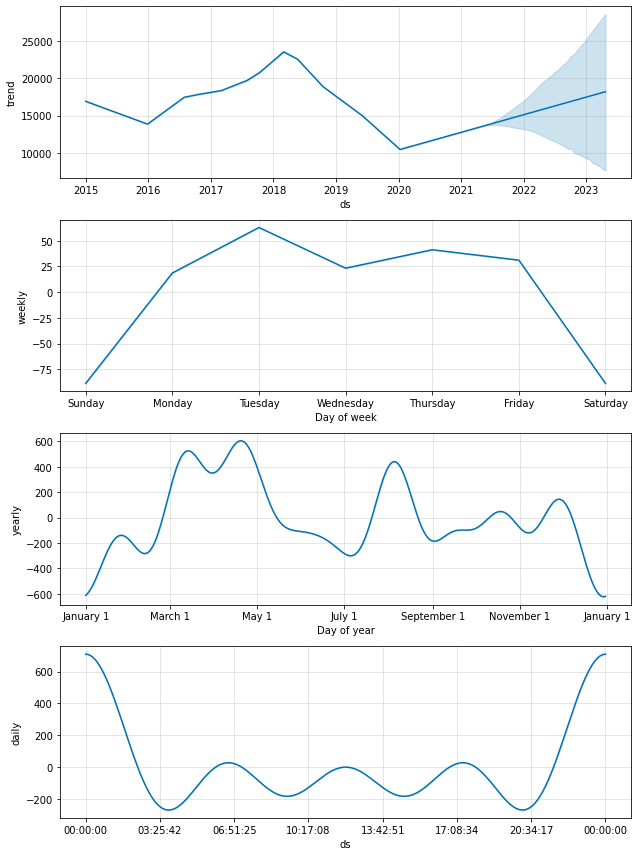

In [ ]:
# Show and plot forecast

print(forecast.tail())
    
fig1 = plot_plotly(m, forecast)
print(fig1.show())

print("Forecast components")
fig2 = m.plot_components(forecast)
print(fig2.show())

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Forecasting_Shoprite_Trends.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/Forecasting_Shoprite_Trends.ipynb to pdf
/usr/local/lib/python2.7/dist-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) [u'text/html'] is not able to be represented.
  mimetypes=output.keys())
[NbConvertApp] Support files will be in Forecasting_Shoprite_Trends_files/
[NbConvertApp] Making directory ./Forecasting_Shoprite_Trends_files
[NbConvertApp] Writing 31781 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 103034 bytes to /content/drive/My Drive/Forecasting_Shoprite_Trends.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'